# Exploratory Data Analysis (EDA):

### Import Packages

In [174]:
import h5py
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### read test image from hdf5 file 

In [175]:
hdf5_path = "../ISIC_2024/test-image.hdf5"

In [176]:
file_hdf5 = h5py.File(hdf5_path, "r")

In [177]:
file_hdf5.keys()

<KeysViewHDF5 ['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']>

In [178]:
file_hdf5['ISIC_0015657']

<HDF5 dataset "ISIC_0015657": shape (), type "|S3318">

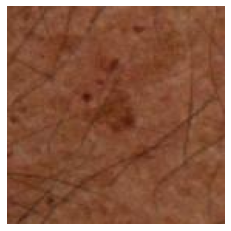

In [179]:
image_data = file_hdf5['ISIC_0015657'][()]
image = Image.open(BytesIO(image_data))

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

### show the dataframe

In [180]:
Training_Path = "../ISIC_2024/train-metadata.csv"
Training_Path

'../ISIC_2024/train-metadata.csv'

In [181]:
training_dataframe= pd.read_csv(Training_Path)

C:\Users\adham\AppData\Local\Temp\ipykernel_25704\3310134963.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  training_dataframe= pd.read_csv(Training_Path)


In [182]:
training_dataframe.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


### dataframe columns information

In [183]:
training_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

### statistics summery

In [184]:
training_dataframe.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.260000e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


### Show duplicates within columns themselves, names and percentage of them

In [185]:
def check_duplicate_columns(training_dataframe):
    duplicated_columns = []
    names_set = set() 

    for i in range(len(training_dataframe.columns)):
        for j in range(i + 1, len(training_dataframe.columns)):
            if (training_dataframe.iloc[:, i] == training_dataframe.iloc[:, j]).all():
                # duplicated_columns[f"{i}"] = training_dataframe.columns[i], training_dataframe.columns[j]
                duplicated_columns.append((training_dataframe.columns[i], training_dataframe.columns[j]))
                names_set.add(training_dataframe.columns[i])
                names_set.add(training_dataframe.columns[j])

    return duplicated_columns, names_set

duplicated_columns,names_set = check_duplicate_columns(training_dataframe)
print(duplicated_columns , names_set )
print('percents of duplicated columns : ', len(names_set)/len(training_dataframe.columns))

[] set()
percents of duplicated columns :  0.0


### show unique values

In [186]:
def unique__values(training_dataframe):
    data = []
    for i in training_dataframe.columns:
        unique = training_dataframe.nunique()[i]
        data.append({
            'column_name': i,
            'length': len(training_dataframe[i]),
            'num_unique': unique,
            'per_num_un': round(unique / len(training_dataframe[i]), 4),
            "Valid_values":  len(training_dataframe[i]) - training_dataframe.isnull().sum()[i],
            "NULL_num": training_dataframe.isnull().sum()[i],
            "per_Null_num": (training_dataframe.isnull().sum()[i]/(len(training_dataframe)))*100
        })

    return pd.DataFrame(data)

summary = unique__values(training_dataframe)
summary

,column_name,length,num_unique,per_num_un,Valid_values,NULL_num,per_Null_num
0,isic_id,401059,401059,1.0000,401059,0,0.000000
1,target,401059,2,0.0000,401059,0,0.000000
2,patient_id,401059,1042,0.0026,401059,0,0.000000
3,age_approx,401059,16,0.0000,398261,2798,0.697653
4,sex,401059,2,0.0000,389542,11517,2.871647
5,anatom_site_general,401059,5,0.0000,395303,5756,1.435200
6,clin_size_long_diam_mm,401059,1758,0.0044,401059,0,0.000000
7,image_type,401059,1,0.0000,401059,0,0.000000
8,tbp_tile_type,401059,2,0.0000,401059,0,0.000000
9,tbp_lv_A,401059,386019,0.9625,401059,0,0.000000


### Separate categorical and numerical values 

In [187]:
cat_cols=training_dataframe.select_dtypes(include=['object']).columns
num_cols = training_dataframe.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols,"\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['isic_id', 'patient_id', 'sex', 'anatom_site_general', 'image_type',
       'tbp_tile_type', 'tbp_lv_location', 'tbp_lv_location_simple',
       'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
       'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'],
      dtype='object') 

Numerical Variables:
['target', 'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thi

# Feature Engineering: (understand the nature of features)

### Change categorical features to numerical if needed

In [188]:
training_dataframe["sex"].unique()

array(['male', 'female', nan], dtype=object)

mapping the "sex" feature

In [189]:
training_dataframe["sex"] = training_dataframe["sex"].map({
    'male':0,
    'female':1, 
}) 

In [190]:
training_dataframe["tbp_lv_location"].unique()

array(['Right Leg - Upper', 'Head & Neck', 'Torso Back Top Third',
       'Torso Front Top Half', 'Right Arm - Upper', 'Left Leg - Upper',
       'Torso Front Bottom Half', 'Left Arm - Upper', 'Right Leg',
       'Torso Back Middle Third', 'Right Arm - Lower',
       'Right Leg - Lower', 'Left Leg - Lower', 'Left Arm - Lower',
       'Unknown', 'Left Leg', 'Torso Back Bottom Third', 'Left Arm',
       'Right Arm', 'Torso Front', 'Torso Back'], dtype=object)

mapping the "tbp_lv_location" feature

In [191]:
training_dataframe["tbp_lv_location"] = training_dataframe["tbp_lv_location"].map({
    'Right Leg - Upper':0,
    'Head & Neck':1, 
    'Torso Back Top Third':2,
    'Torso Front Top Half':3, 
    'Right Arm - Upper':4, 
    'Left Leg - Upper':5, 
    'Torso Front Bottom Half':6,  
    'Left Arm - Upper':7,  
    'Right Leg':8, 
    'Torso Back Middle Third':9,  
    'Right Arm - Lower':10, 
    'Right Leg - Lower':11,  
    'Left Leg - Lower':12, 
    'Left Arm - Lower':13,
    "Unknown":14,
    'Left Leg':15, 
    'Torso Back Bottom Third':16, 
    'Left Arm':17, 
    'Right Arm':18,
    'Torso Front':19, 
    'Torso Back':20
}) 

mapping the "anatom_site_general" feature

In [192]:
training_dataframe["anatom_site_general"].unique()

array(['lower extremity', 'head/neck', 'posterior torso',
       'anterior torso', 'upper extremity', nan], dtype=object)

In [193]:
training_dataframe["anatom_site_general"] = training_dataframe["anatom_site_general"].map({
    'lower extremity':0, 
    'head/neck':1, 
    'posterior torso':2,
    'anterior torso':3, 
    'upper extremity':4 
}) 

we would delete the columns with high number of null values and uncompleted columns as well, finally delete rows which contains null values 

In [194]:
training_dataframe = training_dataframe.drop(["isic_id","patient_id","image_type","tbp_tile_type","tbp_lv_location_simple","attribution","copyright_license",'lesion_id',"iddx_full","iddx_1","iddx_2","iddx_3","iddx_4","iddx_5","mel_mitotic_index","mel_thick_mm"], axis = 1)

In [195]:
training_dataframe.dropna(subset=["sex",'anatom_site_general',"age_approx"], inplace=True)

In [196]:
training_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381914 entries, 0 to 401058
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   target                        381914 non-null  int64  
 1   age_approx                    381914 non-null  float64
 2   sex                           381914 non-null  float64
 3   anatom_site_general           381914 non-null  float64
 4   clin_size_long_diam_mm        381914 non-null  float64
 5   tbp_lv_A                      381914 non-null  float64
 6   tbp_lv_Aext                   381914 non-null  float64
 7   tbp_lv_B                      381914 non-null  float64
 8   tbp_lv_Bext                   381914 non-null  float64
 9   tbp_lv_C                      381914 non-null  float64
 10  tbp_lv_Cext                   381914 non-null  float64
 11  tbp_lv_H                      381914 non-null  float64
 12  tbp_lv_Hext                   381914 non-nul

# Feature Importance

### determining the input X and output y for the classification problem

In [197]:
X = training_dataframe.drop(["target"],axis=1)
y = training_dataframe["target"]

### Standarize the 

In [198]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,tbp_lv_dnn_lesion_confidence
0,0.146827,-0.680909,-1.432965,-0.511968,0.074082,0.385571,-0.238691,-0.642496,-0.175968,-0.390812,...,-0.435704,-1.384853,-0.391424,0.633149,2.265041,-0.025728,-0.913502,-1.040396,-1.118660,0.041241
1,0.146827,-0.680909,-0.726710,-1.623306,2.952957,2.977714,-0.351795,-0.508521,1.155279,0.936583,...,-1.439073,-1.384853,-1.072601,2.680545,-0.171568,-0.596492,0.014641,1.310196,0.013558,-10.413037
2,0.146827,-0.680909,-0.020455,-0.305740,0.659341,0.632232,1.874046,1.505248,1.677554,1.420286,...,-0.506613,-1.384853,-0.559877,-0.469985,0.437584,0.354782,0.643454,1.056918,2.011195,0.294552
3,0.512630,-0.680909,0.685801,-0.408854,-1.432637,-0.781171,-1.285554,-1.281011,-1.578606,-1.348601,...,-0.400730,-0.480703,-0.839213,-1.075413,-0.780265,0.830420,-0.701681,0.984059,0.027031,0.315151
4,-0.218976,-0.680909,0.685801,-0.689553,1.198982,1.466393,-0.326189,-0.246849,0.271647,0.373818,...,-0.914299,-1.384853,-0.363086,0.380616,0.050045,-1.262385,-0.352486,1.097740,-0.392775,-2.957908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381909,0.878433,-0.680909,0.685801,1.641966,0.658965,0.010448,-0.097024,-0.008726,0.181032,-0.034518,...,1.402164,1.781919,2.498398,-0.118942,-0.145938,0.259655,0.763077,0.349213,0.757871,0.316258
381910,0.146827,-0.680909,-0.020455,-0.471868,0.007111,0.318621,1.145141,0.947832,0.864244,0.854828,...,-0.430102,0.040898,-0.481651,1.071511,1.221867,-1.167257,0.281092,0.864357,0.810265,0.316239
381911,0.512630,1.468626,0.685801,-1.079094,-0.656888,-0.724321,0.320258,-0.068909,-0.029569,-0.330253,...,-0.993131,-0.558422,-0.583386,-0.061338,-0.991993,-0.881875,0.292641,0.063256,-1.850785,0.316194
381912,-2.047990,1.468626,0.685801,-0.649453,0.587229,-1.521569,0.049831,0.046511,0.255458,-0.453034,...,-0.468357,0.081784,0.555212,-0.459741,-1.161881,1.020674,-0.035080,-0.395375,-1.511450,0.316259


### Splitting the dataset into two subsets: one for training the model and one for testing the model.

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
sel_1 = DropCorrelatedFeatures(method="pearson", threshold=0.8)
sel_1.fit(X_train)